In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [ ]:
df=pd.read_csv('green_tech_data.csv')
df.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [ ]:
X=df[['carbon_emissions', 'energy_output', 'renewability_index','cost_efficiency']]
y=df[['sustainability']]

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)



In [20]:
model1=LogisticRegression()
model1.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [21]:
y_pred=model1.predict(X_test)

In [22]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [23]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the model", accuracy)

Accuracy of the model 0.95


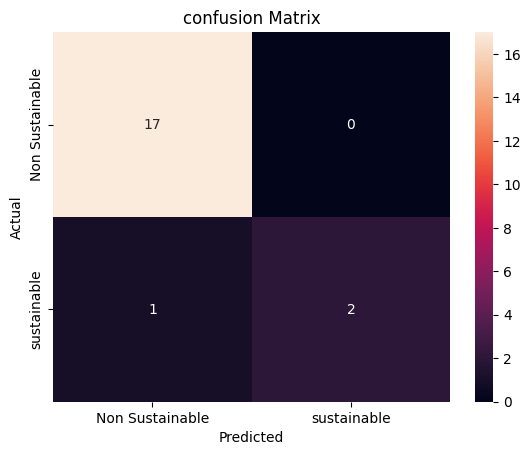

In [24]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', color='blue', xticklabels=['Non Sustainable', 'sustainable'], yticklabels=['Non Sustainable', 'sustainable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion Matrix')
plt.show()

In [25]:
print(classification_report(y_test,y_pred,target_names=['Non Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Non Sustainable       0.94      1.00      0.97        17
    Sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [18]:
joblib.dump(model1, 'logregmodel_sustainable.pk1')

['logregmodel_sustainable.pk1']